### Импортируем библиотеки

In [46]:
import math
import joypy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

### Загружаем данные

In [49]:
Data = pd.read_excel('students_data.xlsx')
Data.drop('Unnamed: 0', axis=1, inplace=True)

In [50]:
Data

,birth,contract,group,retest,ecm1,linal1,matstat,terver,ecm2
0,2001,0,301,0,5,5,5,5,1
1,2001,0,301,0,5,5,5,4,1
2,2000,0,301,0,5,5,5,4,1
3,2000,0,301,0,5,5,4,5,1
4,1999,0,301,0,5,5,5,5,1
...,...,...,...,...,...,...,...,...,...
248,2001,0,312,0,5,3,5,5,1
249,2000,1,312,3,4,3,3,3,0
250,1999,0,312,2,4,3,3,4,1
251,2000,0,312,0,4,3,5,4,1


In [53]:
Data[Data['ecm1'] == 0]
# Data[Data['linal1'] == 0]
# Data[Data['terver'] == 0]
# Data[Data['matstat'] == 0]

,birth,contract,group,retest,ecm1,linal1,matstat,terver,ecm2


#### Один студент на момент исследования не сдал эконометрику-1. Мы уберем его из обучающей выборки, поскольку не знаем его оценку.

In [52]:
Data.drop(Data[Data['ecm1'] == 0].index, inplace=True)

### Изучим данные

#### Описательные статистики

In [54]:
def some_info(df):
    print("Some info about dataset\n") 
    
    # размеры
    print("This dataset has {} features.".format(df.shape[1]), sep='')
    print("This dataset has {} observations.\n".format(df.shape[0]), sep='')
        
    # пропущенные значения
    print("Missing values:\n", df.isna().sum(), "\n", sep='')
    
    # описание
    description = Data.describe().apply(lambda x: round(x, 1))
    description.to_excel('../tables/data_description.xlsx')

    return description

    
some_info(Data)

Some info about dataset

This dataset has 9 features.
This dataset has 252 observations.

Missing values:
birth       0
contract    0
group       0
retest      0
ecm1        0
linal1      0
matstat     0
terver      0
ecm2        0
dtype: int64



,birth,contract,group,retest,ecm1,linal1,matstat,terver,ecm2
count,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
mean,2000.0,0.3,305.9,3.5,4.0,3.4,4.1,4.1,0.4
std,0.8,0.4,3.3,4.7,0.8,0.7,0.8,0.8,0.5
min,1994.0,0.0,301.0,0.0,3.0,3.0,3.0,3.0,0.0
25%,2000.0,0.0,303.0,0.0,3.0,3.0,3.8,3.0,0.0
50%,2000.0,0.0,306.0,2.0,4.0,3.0,4.0,4.0,0.0
75%,2000.0,1.0,309.0,5.0,5.0,3.0,5.0,5.0,1.0
max,2002.0,1.0,312.0,28.0,5.0,5.0,5.0,5.0,1.0


#### Корреляционная матрица

In [55]:
# возьмем корреляционную матрицу и округлим все значения до второго знака после запятой
correlation_matrix = Data.corr().apply(lambda x: round(x, 2))

# отобразим на графике
# sns.heatmap(correlation_matrix, annot = True, linewidth=.9, center=-4).get_figure().savefig('sns_correlation.png')

# сохраним значения в отдельный файл
correlation_matrix.to_excel('../tables/correlation_matrix.xlsx')

# выведем ее на экран, чтобы скопировать в документ
correlation_matrix

,birth,contract,group,retest,ecm1,linal1,matstat,terver,ecm2
birth,1.00,-0.07,0.00,-0.21,0.10,0.02,0.11,0.07,0.06
contract,-0.07,1.00,0.46,0.24,-0.36,-0.24,-0.30,-0.32,-0.29
group,0.00,0.46,1.00,0.21,-0.46,-0.37,-0.21,-0.22,-0.35
retest,-0.21,0.24,0.21,1.00,-0.50,-0.34,-0.42,-0.49,-0.21
ecm1,0.10,-0.36,-0.46,-0.50,1.00,0.49,0.46,0.49,0.50
linal1,0.02,-0.24,-0.37,-0.34,0.49,1.00,0.23,0.33,0.35
matstat,0.11,-0.30,-0.21,-0.42,0.46,0.23,1.00,0.53,0.23
terver,0.07,-0.32,-0.22,-0.49,0.49,0.33,0.53,1.00,0.23
ecm2,0.06,-0.29,-0.35,-0.21,0.50,0.35,0.23,0.23,1.00


#### Графики

#### Построим гистограмму, где по оси "y" отмечено количество студентов, а по оси "x" их оценка за курс "Эконометрика-1", чтобы визуаьно представить с какими оценками по экм-1 студенты идут на экм-2.

'hist'

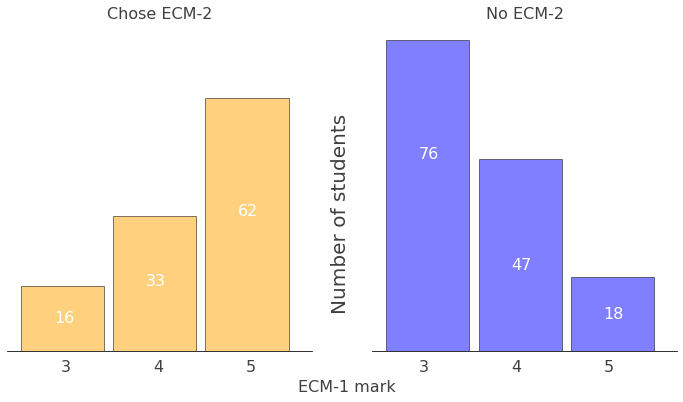

In [56]:
# разобьем студентов на 2 части: тех, кто выбрал экм-2 и тех кто нет
ecm_2 = Data[Data['ecm2'] == 1]
no_ecm = Data[Data['ecm2'] == 0]


def show_marks():
    # создаем фигуру, разбитую на две части
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
    
    # называем график
    ax1.set_title('Chose ECM-2', fontsize=16, c='#3f3f3f')
    
    # на левой половине строим гистограмму для студентов, выбравших экм-2
    ax1.hist(ecm_2['ecm1'], bins=[3, 4, 5, 6], color='orange', alpha = .5, edgecolor='black', width=0.90)
    
    # добавляем название к левому графику
    ax1.text(6, -10, 'ECM-1 mark', fontsize=16, c='#3f3f3f')
    
    # обозначим столбцы на оси "x"
    ax1.text(3.435, -5, "3", fontsize=16, c='#3f3f3f')
    ax1.text(4.435, -5, "4", fontsize=16, c='#3f3f3f')
    ax1.text(5.435, -5, "5", fontsize=16, c='#3f3f3f')

    # обозначаем высоту столбца цифрой
    ax1.text(3.355, 7, len(ecm_2[ecm_2['ecm1'] == 3]), fontsize=16, c='#ffffff')
    ax1.text(4.355, 16, len(ecm_2[ecm_2['ecm1'] == 4]), fontsize=16, c='#ffffff')
    ax1.text(5.355, 33, len(ecm_2[ecm_2['ecm1'] == 5]), fontsize=16, c='#ffffff')

    # убираем верхнюю, правую и левую оси, а таже отметки на осях
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    
    # назовем ось "y" и расположим ее между половинами под углом 90 градусов
    ax2.text(2.4, 10, 'Number of students', fontsize=20, c='#3f3f3f', ).set_rotation(90)

    
    
    # назовем правый график
    ax2.set_title('No ECM-2', fontsize=16, c='#3f3f3f')
    
    # строим гистограмму на второй половине
    ax2.hist(no_ecm['ecm1'], bins=[3, 4, 5, 6], color='blue', alpha = .5, edgecolor='black', width=0.9)\
    
    # удаляем верхнюю, правую и левую оси, а также отметки на осях
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.set_yticks([])
    ax2.set_xticks([])
    
    # подпишем значения на оси "x"
    ax2.text(3.355, -5, "3", fontsize=16, c='#3f3f3f')
    ax2.text(4.355, -5, "4", fontsize=16, c='#3f3f3f')
    ax2.text(5.355, -5, "5", fontsize=16, c='#3f3f3f')
    
    # подпишем высоту столбцов
    ax2.text(3.355, 47, len(no_ecm[no_ecm['ecm1'] == 3]), fontsize=16, c='#ffffff')
    ax2.text(4.355, 20, len(no_ecm[no_ecm['ecm1'] == 4]), fontsize=16, c='#ffffff')
    ax2.text(5.355, 8, len(no_ecm[no_ecm['ecm1'] == 5]), fontsize=16, c='#ffffff')
    
    # сохраним график в .png
    plt.savefig('../plots/ecm1_mark.png')    
    
    return 'hist'

show_marks()

#### Теперь построим график, чтобы проверить, можно ли выделить кластеры на основе среднего балла и группы студента. На левом графике будут представлены контрактники, на правом бюджетники. Красным цветом будут отмечены студенты, выбравшие экм-2, а синим - не выбравшие.

'scatter'

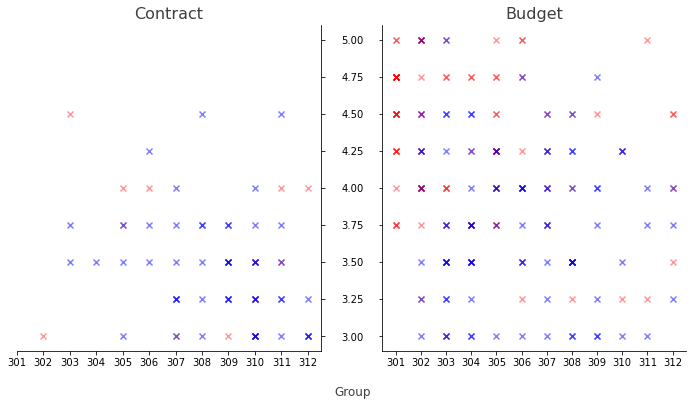

In [58]:
def show_mean_marks(Data):
    # добавим переменную равную средней оценке за линал, тервер, матстат и экм1
    Data['mean_mark'] = (Data['linal1'] + Data['matstat'] + Data['terver'] + Data['ecm1'])/4

    # разобьем выборку на контрактников и бюджетников
    con = Data[Data['contract'] == 1]
    no_con = Data[Data['contract'] == 0]

    # разобьем контрактников на тех кто взял экм2 и тех кто нет
    ecm_2_con = con[con['ecm2'] == 1]
    no_ecm_con = con[con['ecm2'] == 0]

    # разобьем бюджетников на тех кто взял экм2 и тех кто нет
    ecm_2_no_con = no_con[no_con['ecm2'] == 1]
    no_ecm_no_con = no_con[no_con['ecm2'] == 0]

    # создадим фигуру и разобъем ее на 2 части
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # назовем левый график
    ax1.set_title('Contract', fontsize=16, c='#3f3f3f')
    
    # построим график разброса, с красными крестиками для записанных на экм-2
    ax1.scatter(ecm_2_con['group'], ecm_2_con['mean_mark'], alpha=.4, c='red', marker='x')
    # и синим для незаписанных
    ax1.scatter(no_ecm_con['group'], no_ecm_con['mean_mark'], alpha=.5, c='blue', marker='x')
    # была выбрана прозрачность 0.5, чтобы насыщенность цвета говорила о количестве наблюдений
    # которому соответствует маркер
    
    # уберем верхнюю и левую оси
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    # подпишем ось "x" и обозначим отметки
    ax1.set_xticks(list(range(301, 313)))
    ax1.text(313, 2.6, 'Group', fontsize=12, c='#3f3f3f')
    
    # объединим оси "y" для обоих графиков
    ax1.tick_params(axis="y",direction="out", pad=17)
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()


    # назовем график для бюджетников
    ax2.set_title('Budget', fontsize=16, c='#3f3f3f')

    # построим правый график красным для записанных на экм-2
    ax2.scatter(ecm_2_no_con['group'], ecm_2_no_con['mean_mark'], alpha=.4, c='red', marker='x')
    # и синим для незаписанных
    ax2.scatter(no_ecm_no_con['group'], no_ecm_no_con['mean_mark'], alpha=.5, c='blue', marker='x')
    # оставляем прозрачность 0.5
    
    # уберем верхнюю и правую оси, и подпишем отметки на оси "x"
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_xticks(list(range(301, 313)))
    
    # сохраним график в .png
    plt.savefig('../plots/contract_means.png')    
    
    return 'scatter'

show_mean_marks(Data)

### Теперь визуализируем влияние года рождения и количества пересдач на выбор экм-2

'parallel'

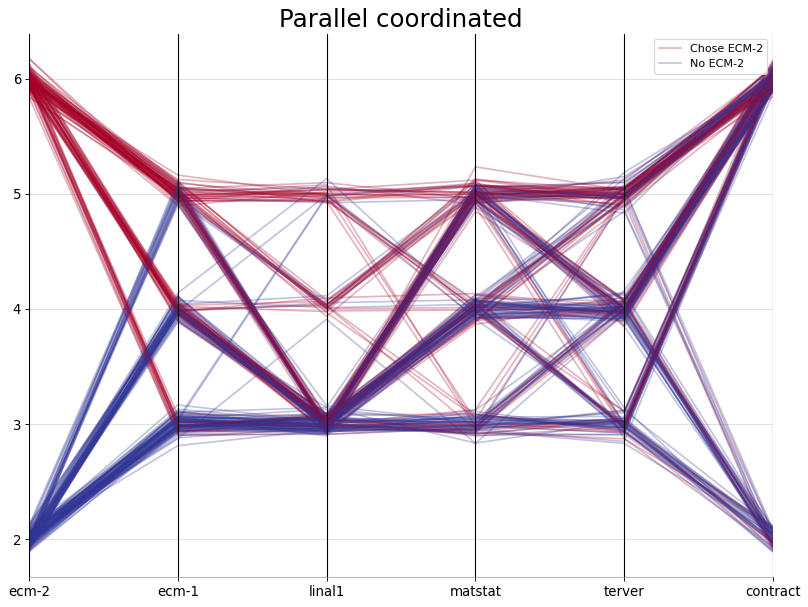

In [60]:

def show_parallel():
    # создадим датафрейм для данных для отображения, так как мы их несколько изменим для наглядного отображения
    graph_data = pd.DataFrame()
    
    # так как оценки по предметам категориальные переменные, то все наблюдения будут попадать в точки 3, 4, 5
    # для наглядности мы добавили нормальный шум со стандартным отклонением 0.06, чтобы по толщине выходящего
    # потока можно было судить о количестве студентов, которое он описывает
    disp = 0.06
    graph_data['ecm-2'] = (-4*(1-Data['ecm2'])+6) + np.random.normal(0, disp, 252)
    graph_data['ecm-1'] = Data['ecm1'] + np.random.normal(0, disp, 252)
    graph_data['econom_2'] = Data['ecm2'].apply(lambda x: 'Chose ECM-2' if x == 1 else 'No ECM-2')
    graph_data['linal1'] = Data['linal1'] + np.random.normal(0, disp-0.01, 252)
    graph_data['matstat'] = Data['matstat'] + np.random.normal(0, disp, 252)
    graph_data['terver'] = Data['terver'] + np.random.normal(0, disp, 252)
    graph_data['contract'] = (-4*Data['contract']+6) + np.random.normal(0, disp, 252)

    # строим график
    fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi= 80)
    parallel_coordinates(graph_data, 'econom_2', alpha = 0.3, colormap='RdYlBu')

    # поставим название
    plt.title('Parallel coordinated', fontsize=22)
    
    # увеличиваем прозрачность рамки
    ax.spines["top"].set_alpha(0)
    ax.spines["bottom"].set_alpha(.3)
    ax.spines["right"].set_alpha(0)
    ax.spines["left"].set_alpha(.3)

    # увеличим прозрачность сетки
    ax.grid(alpha=0.4)
    
    # изменим размер шрифта подписей отметок
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # сохраним
    plt.savefig('../plots/parallel.jpg')
    
    return 'parallel'

show_parallel()